# Face emotions analysis

In [77]:
from fastai import *
from fastai.vision import *
import pdb

## CK +

Face emotion classifier using the [CK+ dataset](http://www.pitt.edu/~emotion/ck-spread.htm)

In [17]:
path = Path('../../datasets/CK+/')
image_path = path/'cohn-kanade-images'
anno_path = path/'Emotion'

In [11]:
PATH.ls()

[PosixPath('../../datasets/CK+/FACS'),
 PosixPath('../../datasets/CK+/Landmarks'),
 PosixPath('../../datasets/CK+/FACS_labels.zip'),
 PosixPath('../../datasets/CK+/Emotion'),
 PosixPath('../../datasets/CK+/__MACOSX'),
 PosixPath('../../datasets/CK+/ReadMeCohnKanadeDatabase_website.txt'),
 PosixPath('../../datasets/CK+/CVPR2010_CK.pdf'),
 PosixPath('../../datasets/CK+/extended-cohn-kanade-images.zip'),
 PosixPath('../../datasets/CK+/Consent-for-publication (1).doc'),
 PosixPath('../../datasets/CK+/Emotion_labels.zip'),
 PosixPath('../../datasets/CK+/Landmarks.zip'),
 PosixPath('../../datasets/CK+/cohn-kanade-images')]

### Get the Data

In [164]:
def annotate(item):
    p = anno_path/('/'.join(item.parts[-3:])[:-4] + '_emotion.txt')
    try:
        with p.open() as f:
            return int((f.readline()[3:4]))
    except:
        return None

In [166]:
def filter_last(item):
    """
    only keep the last image of all the images for a given person and a given emotion
    """
    # path to the folder containing all the images 
    p = image_path/('/'.join(item.parts[-3:-1]))
    # only keep actual numbers as ls also list hidden files
    l = lambda x : int(x) if x.isdigit() else -1
    # find the number of the last image in the folder
    m = max([l(f.parts[-1][-6:-4]) for f in p.ls()])
    # flag is true if the emotion is labeled
    flag = True if annotate(item) else False 
    # return True if item is the last image
    return (int(item.parts[-1][-6:-4]) == m) and flag

In [169]:
tfms = get_transforms()
# pdb.set_trace()
data = (ImageItemList.from_folder(image_path) #Where to find the data? -> in path and its subfolders
        .filter_by_func(filter_last)
        .random_split_by_pct()              #How to split in train/valid? -> use the folders
        .label_from_func(annotate)            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())    

0. neutral
1. anger
2. contempt
3. disgust
4. fear
5. happy
6. sadness
7. surprise

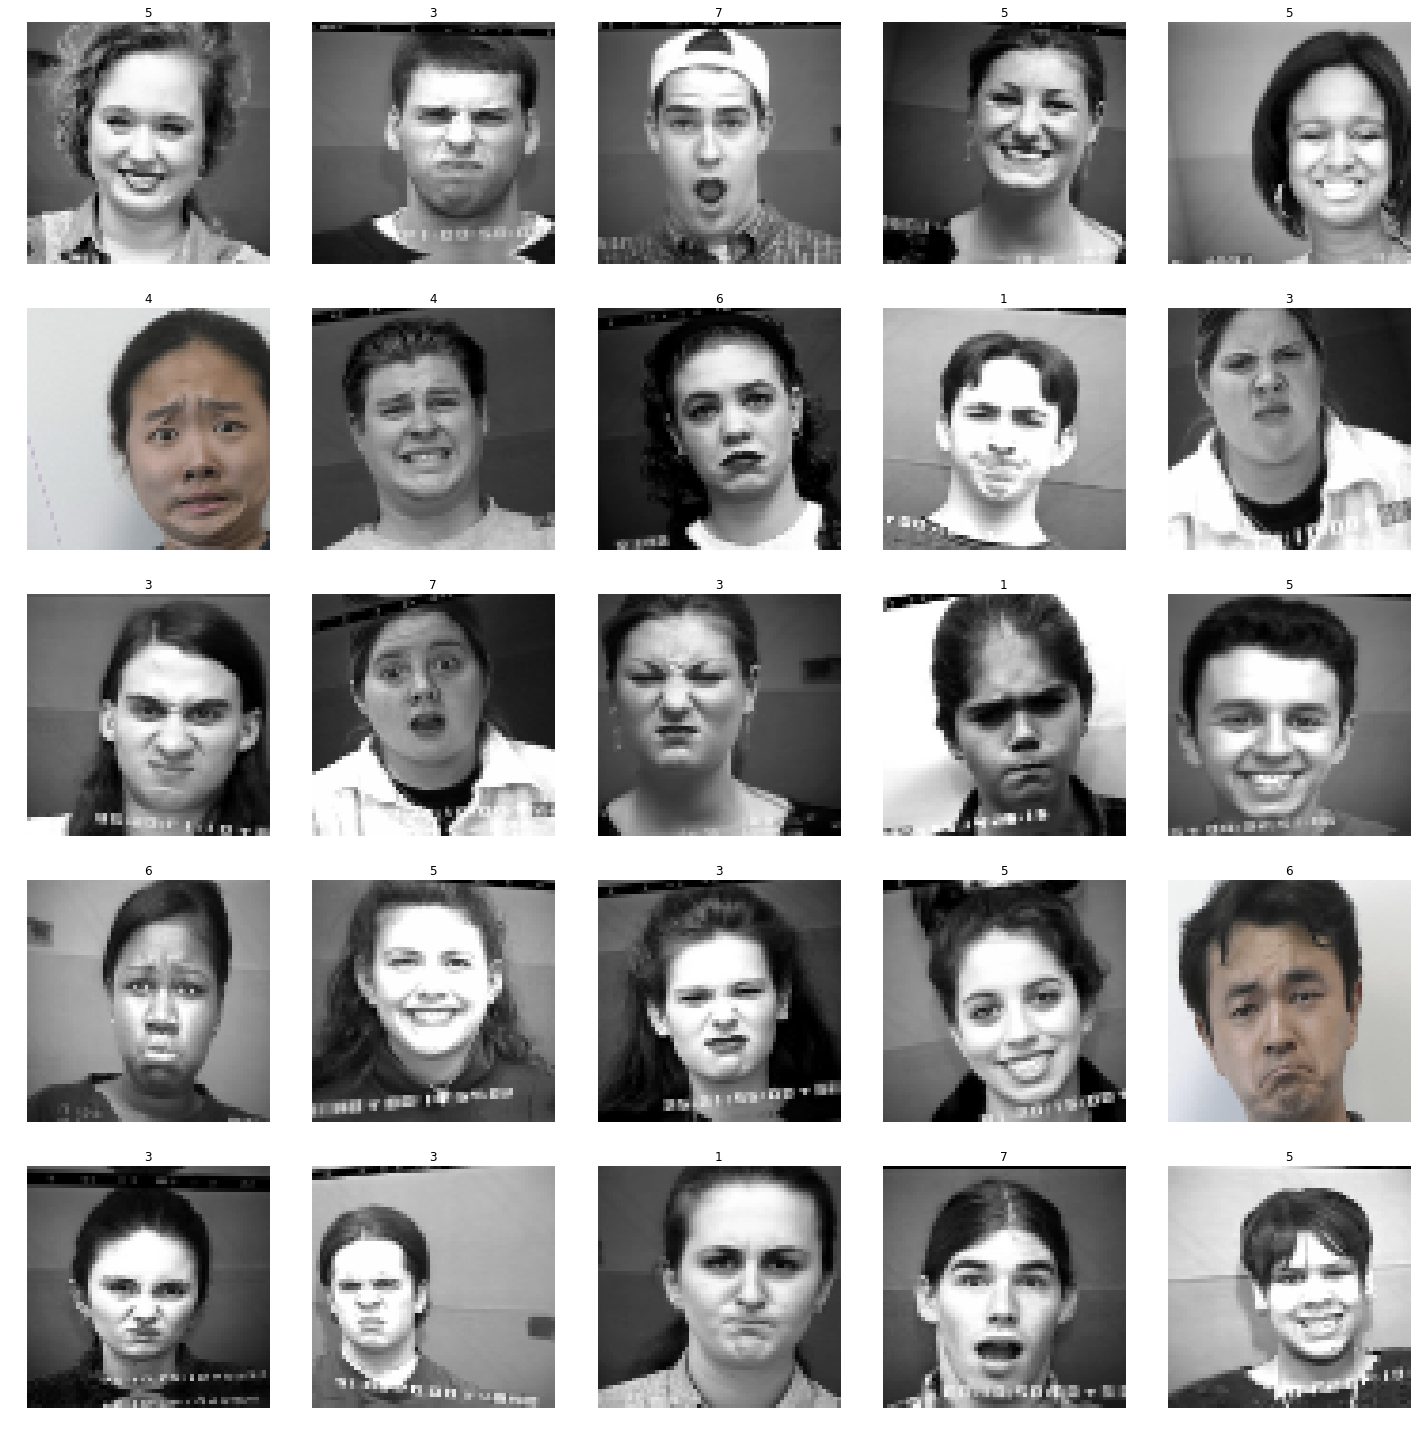

In [172]:
data.show_batch()

### Build the classifier and train it

In [173]:
learner = create_cnn(data, models.resnet50, metrics=[accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


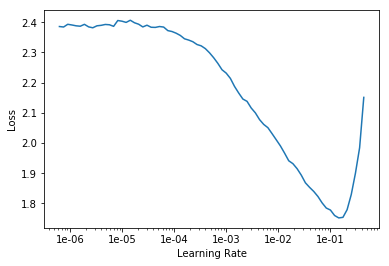

In [176]:
learner.lr_find()
learner.recorder.plot()

In [177]:
lr = 5e-3

In [178]:
learner.fit_one_cycle(5,1e-3)

epoch,train_loss,valid_loss,accuracy
1,2.378741,2.381674,0.092308
2,2.220418,2.346186,0.138462
3,2.051458,2.194103,0.153846
4,1.948332,2.185320,0.169231
5,1.902824,2.191231,0.200000


In [179]:
learner.fit_one_cycle(5,1e-3)

epoch,train_loss,valid_loss,accuracy
1,1.558890,2.111708,0.230769
2,1.555044,1.971404,0.292308
3,1.544775,1.901590,0.338462
4,1.509706,1.812513,0.353846
5,1.456614,1.748427,0.400000


In [180]:
learner.fit_one_cycle(20,1e-3)

epoch,train_loss,valid_loss,accuracy
1,1.300178,1.721207,0.400000
2,1.347784,1.676064,0.415385
3,1.318085,1.657086,0.492308
4,1.321901,1.638546,0.461538
5,1.320918,1.524426,0.507692
6,1.290984,1.590298,0.492308
7,1.246254,1.574611,0.523077
8,1.218043,1.525583,0.584615
9,1.188446,1.474807,0.538462
10,1.164795,1.459238,0.538462


In [181]:
preds,y,losses = learner.get_preds(with_loss=True)

In [182]:
interp = ClassificationInterpretation(data, preds, y, losses)

0. neutral
1. anger
2. contempt
3. disgust
4. fear
5. happy
6. sadness
7. surprise


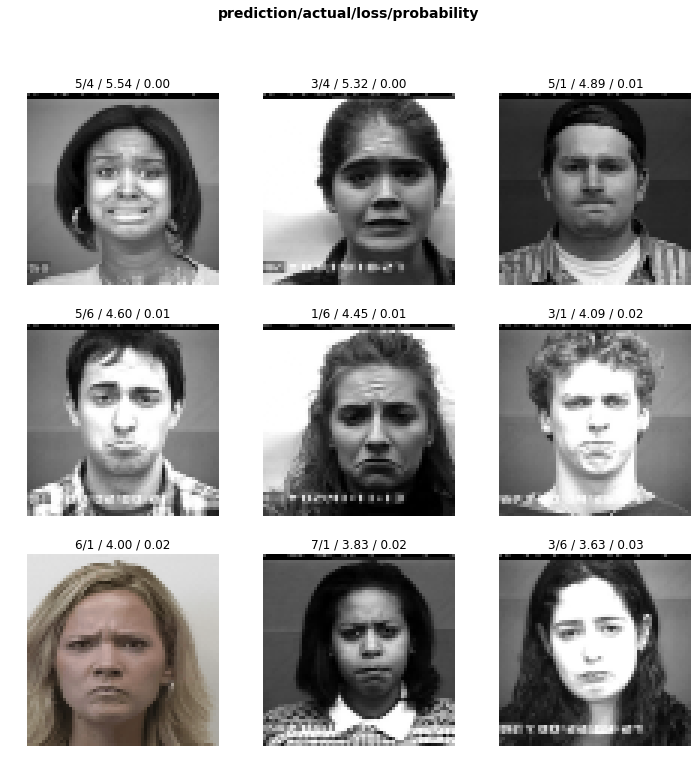

In [183]:
interp.plot_top_losses(9)

## Facial Expressions

Face emotion classifier using the [Facial Expressions dataset](https://github.com/muxspace/facial_expressions)